Image Classification using FashionMNIST datasaet

In [1]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout


Load Dataset

In [10]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
#For any given pixel of the image, the value assigned to that pixel can fall between 0 and 255. 
#Which brings us to our next line of code:
x_train, x_test = x_train /255.0, x_test /255.0
print("x_train shape", x_train.shape)

4422102/4422102 [==============================] - 0s 0us/step
x_train shape (60000, 28, 28)


In [16]:
#the data is only 2D!
#convolution expects height x width x clor
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [17]:
#number of classes
K = len(set(y_train))
print("number of classes: ", K)

number of classes:  10


Build the CNN

In [18]:
#Build the model using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [20]:
#Complete and fit 
#Note: make sure you are using hte GPU for this!
model.compile(optimizer='adam',  loss='sparse_categorical_crossentropy', metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)


Epoch 1/15
1875/1875 [==============================] - 37s 19ms/step - loss: 0.5094 - accuracy: 0.8101 - val_loss: 0.3903 - val_accuracy: 0.8523
Epoch 2/15
1875/1875 [==============================] - 38s 20ms/step - loss: 0.3504 - accuracy: 0.8680 - val_loss: 0.3240 - val_accuracy: 0.8815
Epoch 3/15
1875/1875 [==============================] - 34s 18ms/step - loss: 0.3022 - accuracy: 0.8862 - val_loss: 0.3248 - val_accuracy: 0.8827
Epoch 4/15
1875/1875 [==============================] - 61s 33ms/step - loss: 0.2714 - accuracy: 0.8988 - val_loss: 0.3023 - val_accuracy: 0.8901
Epoch 5/15
1875/1875 [==============================] - 41s 22ms/step - loss: 0.2467 - accuracy: 0.9070 - val_loss: 0.2920 - val_accuracy: 0.8928
Epoch 6/15
1875/1875 [==============================] - 41s 22ms/step - loss: 0.2239 - accuracy: 0.9147 - val_loss: 0.2882 - val_accuracy: 0.8986
Epoch 7/15
1875/1875 [==============================] - 50s 27ms/step - loss: 0.2075 - accuracy: 0.9215 - val_loss: 0.3061 -

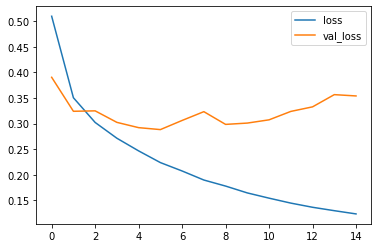

In [22]:
#Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

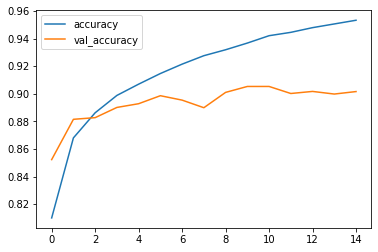

In [23]:
#Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

313/313 [==============================] - 2s 5ms/step
Confusion matrix, without normalization
[[858   1  20  19   1   3  93   0   5   0]
 [  1 977   2  14   2   0   2   0   2   0]
 [ 18   0 853   9  44   0  71   0   5   0]
 [ 17   8  17 917  22   0  18   0   1   0]
 [  1   0  84  34 807   1  73   0   0   0]
 [  0   0   0   1   0 977   1  13   1   7]
 [112   0  49  22  78   0 731   0   8   0]
 [  0   0   0   0   0   9   0 947   0  44]
 [  3   1   3   4   3   4   3   2 974   3]
 [  1   0   0   0   0   5   0  19   0 975]]


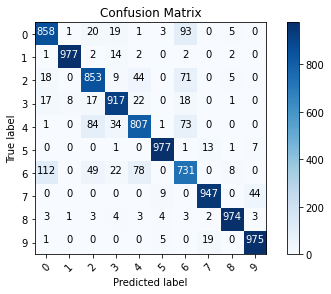

In [24]:
from sklearn.metrics import confusion_matrix 
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, 
                          normalize=False, 
                          title='Confusion Matrix', 
                          cmap=plt.cm.Blues):
    """
    This funciton pronts out confusion matrix
    Normalization can be applied by setting 'nomalize=True
    """

    if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion metrix")

    else:
      print('Confusion matrix, without normalization')
    
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i,j], fmt),
               horizontalalignment="center",
               color="white" if cm[i,j] > thresh else "black")
      
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [26]:
#Labels mapping
labels = '''
T-sihrt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot
'''.split()

Text(0.5, 1.0, 'True label: T-sihrt/top Predicted: Shirt')

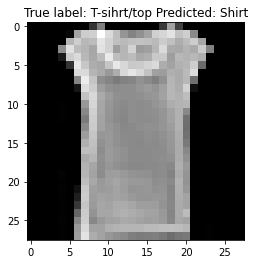

In [27]:
#shwo some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))